# EDA

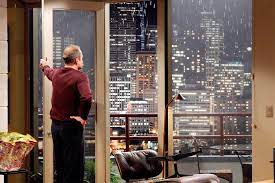

In [4]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Understand your Data
Firstly we start our EDA by reading in our data and get some basic information for our dataset. Therefore we import our dataset into a dataframe and have a basic look at it.

In [5]:
df = pd.read_csv("data/King_County_House_prices_dataset.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


Now we need to know what information the different columns contain and have a look at the shape of our dataset, meaning how long and wide it is. Also we check which Datatype there are.

In [6]:
df.shape

(21597, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Data types: 
* **Object:** We have a lot of object data-types in our dataset. This means, we have strings (meaning text) or mixed data-types in these columns. For some this is true - however talking about selling date or **sqft_basement** we need to change our data-types into a date format later on. 
<br>

* **int64:** Furthermore we have integers for the id, bedrooms, sqft_living/sqft_lot, zipcode and some others. This makes sense, since we are expecting numerical values in these columns.
<br>

* **float64:** Additionally we have floats for some of these. This makes also sense for columns like long and lat to calculate the geographical location of the house. For others like floors, yr_renovated or the bathrooms in contrast, it is a little off. So we have to keep that in mind for later steps in exploring and cleaning the data.
<br>
In this Table we can already see that our dataset is at a good basic starting point because there are no major gaps and no important data values are missing. Nevertheless we have different kinds of data types in our dataset to consider.
So generally we assume the data is complete (it has no missing values) and is correct (has no obvious logical problems that defy our understanding of the content).

## Initial Hypotheses about the Dataset
<br>
After browsing through our data and figuring out, what data we have in front of us, i now want to build some hypotheses in relation to our expectations, about what is contained in the data.
The Following Hypotheses i will try to investigate in the upcoming steps:
<br>

1. The number of rooms tend to contribute to the selling price
2. The more actual living space the more the price increases
3. Depending on the zip-code there is a pattern in selling prices
4. Houses with better grades tend to have recently been renovated 
5. There are times during the year in which selling prices tend to be higher

I also want to have a clearer view of the data to be able to give some action recommendation to my chosen stakeholder Bonnie Brown.

    But who is Bonnie Brown??
* She is a **Seller**
* **She Has a house and wants to move soon** (timing?), 
* **She wants high profit** (as high as possible) in middle class Neighborhood

In [15]:
#df.condition.head(60).count().unique.reset_index()
#a = df.groupby(['condition']).count().reset_index()
#a

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')


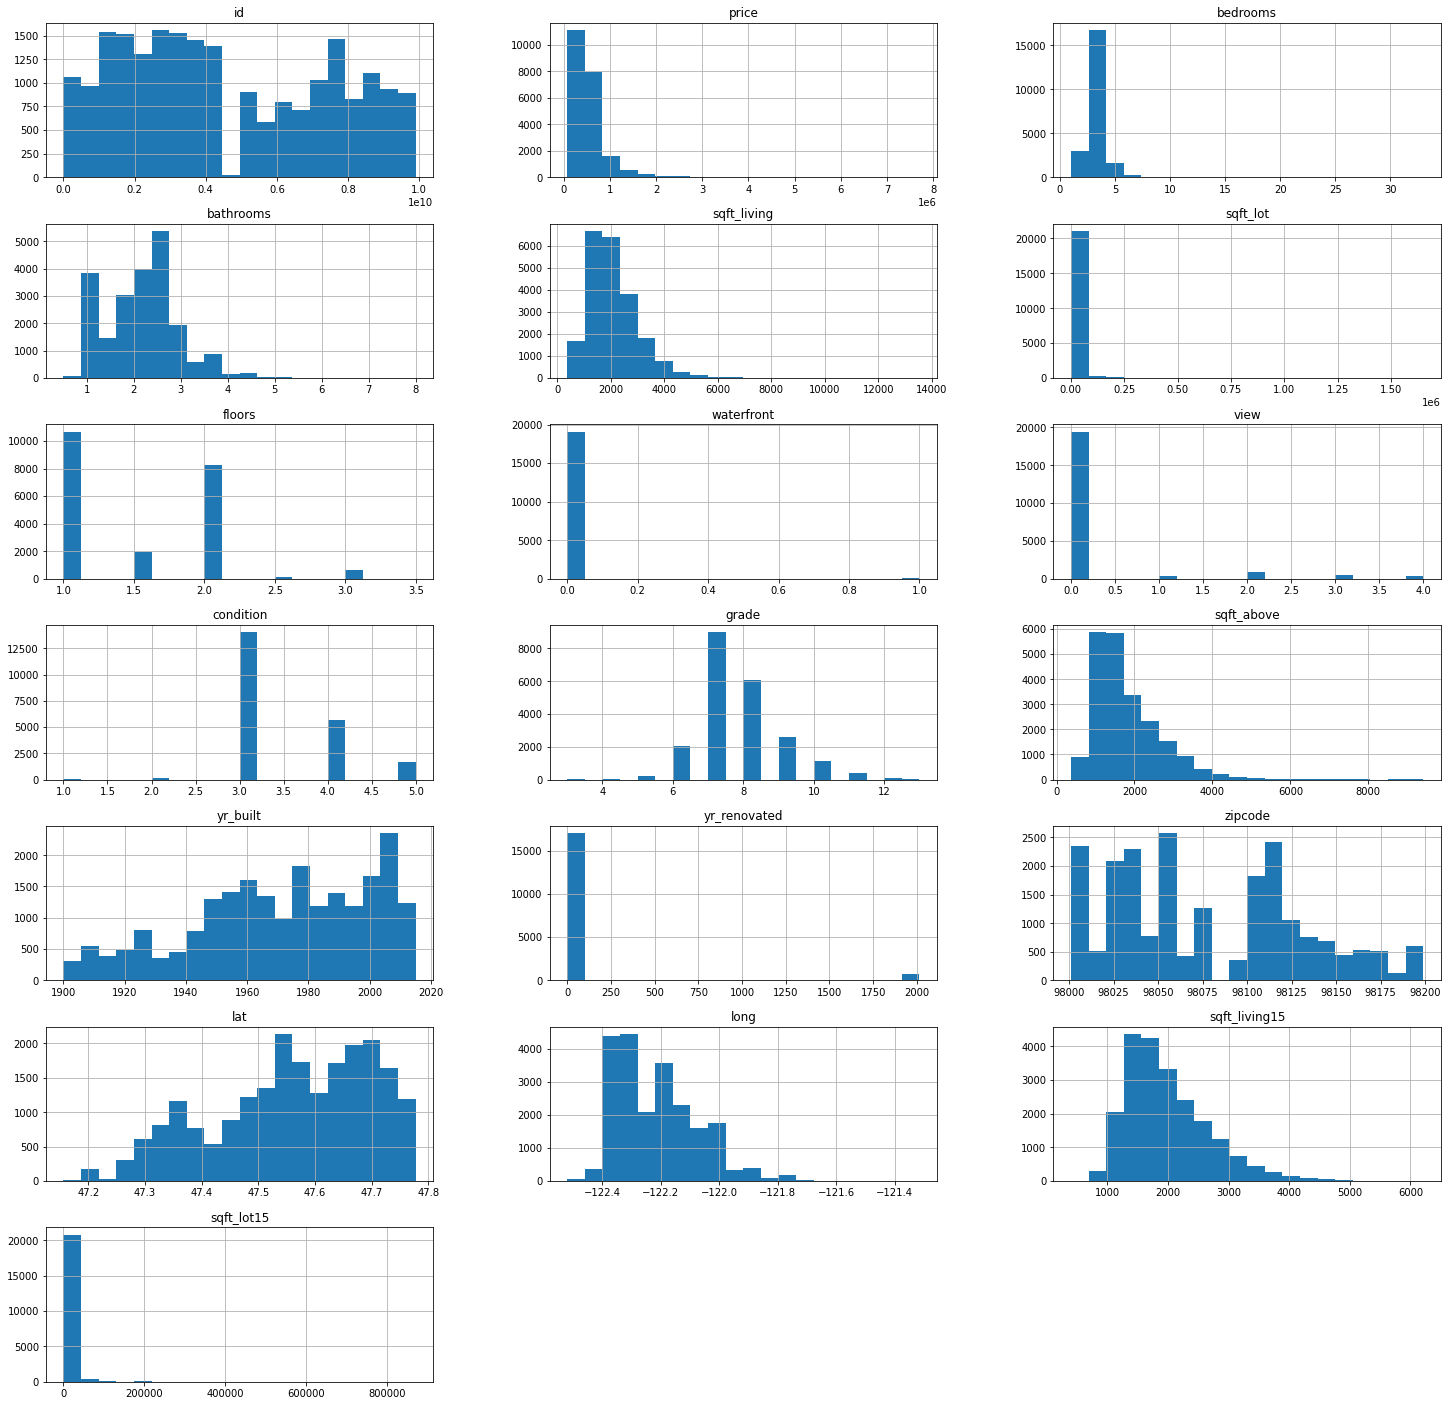

In [14]:
# Save names of all numerical columns in list
column_num = df.select_dtypes(include=np.number).columns
print(column_num)
#Plot histograms of all numerical columns
df[column_num].hist(bins=20, figsize=(25, 25), layout=(7, 3));